In [17]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

data=pd.read_csv("robusta.txt", header=0, sep="\t")

In [15]:
data

,Month,Price,Change
0,Jul 2002,0.63,-
1,Aug 2002,0.61,-3.17%
2,Sep 2002,0.71,16.39%
3,Oct 2002,0.73,2.82%
4,Nov 2002,0.84,15.07%
...,...,...,...
230,Sep 2021,2.31,10.00%
231,Oct 2021,2.32,0.43%
232,Nov 2021,2.41,3.88%
233,Dec 2021,2.48,2.90%


In [91]:
train=data.iloc[:223]
test=data.iloc[223:]
start=len(train)
stop=len(data)-1
AR3fit=AutoReg(data['Price'],lags=3).fit()
predictionsAR3=AR3fit.predict(start=start,end=stop,dynamic=False)

C:\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<AxesSubplot:>

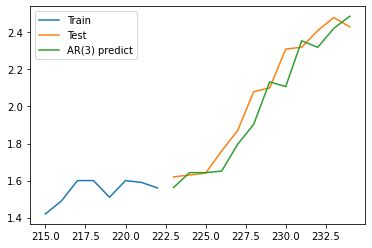

In [92]:
train['Price'].iloc[215:].plot(legend=True,label='Train')
test['Price'].plot(legend=True,label='Test')
predictionsAR3.plot(legend=True,label='AR(3) predict')

In [61]:
data['PriceDiff']=data['Price'].diff()

In [76]:
data.iloc[5:223]['PriceDiff']

5      0.00
6      0.07
7     -0.01
8     -0.08
9      0.00
       ... 
218    0.00
219   -0.09
220    0.09
221   -0.01
222   -0.03
Name: PriceDiff, Length: 218, dtype: float64

C:\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<AxesSubplot:>

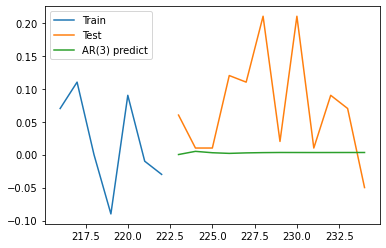

In [93]:
train=data.iloc[1:223]
test=data.iloc[223:]
start=len(train)
stop=len(data)-1
AR1fit=AutoReg(data.iloc[1:223]['PriceDiff'],lags=5).fit()
predictionsAR1=AR1fit.predict(start=start,end=stop,dynamic=False)
train['PriceDiff'].iloc[215:].plot(legend=True,label='Train')
test['PriceDiff'].plot(legend=True,label='Test')
predictionsAR1.plot(legend=True,label='AR(3) predict')